# MNIST autoencoder example

Simple autoencoder example using MNIST dataset.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [2]:
learning_rate = 0.001
batch_size = 1000
n_epochs = 20

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Display some examples of the training data.

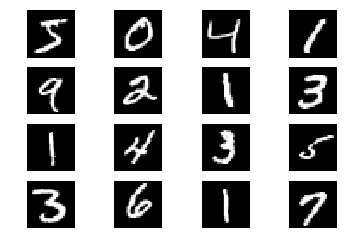

In [4]:
fig, subplots = plt.subplots(4, 4)

for i in range(16):
    x_index = i % 4
    y_index = i // 4

    ax = subplots[y_index, x_index]
    ax.axis('off')
    ax.imshow(x_train[i], cmap='gray')

In [5]:
x_batch = tf.placeholder(tf.float32, shape=(None, 28, 28), name='input_images')

Reformat and reshape data.

In [6]:
x_reshape = tf.reshape(x_batch, (-1, 28, 28, 1))

In [7]:
# TODO: normalize data

In [8]:
# Encode

# Size is (N, 28, 28, 1)

conv_1 = tf.contrib.layers.conv2d(
    inputs=x_reshape,
    num_outputs=16,
    kernel_size=3,
    stride=1,
    padding='SAME',
    activation_fn=tf.nn.relu)

# Size is (N, 28, 28, 16)

max_pool_1 = tf.nn.max_pool(
    value=conv_1,
    ksize=(1, 2, 2, 1),
    strides=(1, 2, 2, 1),
    padding='SAME',
    data_format='NHWC',
    name='max_pool_1')

# Size is (N, 14, 14, 16)

conv_2 = tf.contrib.layers.conv2d(
    inputs=max_pool_1,
    num_outputs=32,
    kernel_size=3,
    stride=1,
    padding='SAME',
    activation_fn=tf.nn.relu)

# Size is (N, 14, 14, 32)

max_pool_2 = tf.nn.max_pool(
    value=conv_2,
    ksize=(1, 2, 2, 1),
    strides=(1, 2, 2, 1),
    padding='SAME',
    data_format='NHWC',
    name='max_pool_2')

# Size is (N, 7, 7, 16)

In [9]:
# Decode

upsample_1 = tf.keras.layers.UpSampling2D(
    size=(2, 2),
    data_format='channels_last'
)(max_pool_2)

# Size is (N, 14, 14, 16)

deconv_1 = tf.layers.conv2d_transpose(
    inputs=upsample_1,
    filters=16,
    kernel_size=3,
    strides=(1, 1),
    padding='SAME',
    activation=tf.nn.relu,
    name='deconv_1')

# Size is (N, 14, 14, 16)

upsample_2 = tf.keras.layers.UpSampling2D(
    size=(2, 2),
    data_format='channels_last'
)(deconv_1)

# Size is (N, 28, 28, 16)

deconv_2 = tf.layers.conv2d_transpose(
    inputs=upsample_2,
    filters=1,
    kernel_size=3,
    strides=(1, 1),
    padding='SAME',
    activation=tf.nn.relu,
    name='deconv_2')

# Size is (N, 28, 28, 1)

In [10]:
train_loss = tf.losses.mean_squared_error(x_reshape, deconv_2)

adam_opt = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_opt = adam_opt.minimize(loss=train_loss)

In [11]:
sess = tf.Session()

writer = tf.summary.FileWriter('./tb_simple_convolutional_network', sess.graph)

init = tf.global_variables_initializer()

sess.run(init)

n_batches = x_train.shape[0] // batch_size

for epoch in range(n_epochs):
    print('epoch:', epoch)
    total_loss = 0.0
    for batch in range(n_batches):
        # Get batch of data
        start_index = batch_size * batch
        end_index = start_index + batch_size
        x_train_batch = x_train[start_index: end_index].astype(np.float32)
        
        _, loss = sess.run(
            (train_opt, train_loss),
            feed_dict={x_batch: x_train_batch})
        total_loss = total_loss + loss
        tf.summary.scalar('total_loss', total_loss)
        tf.summary.merge_all()
    print('total_loss:', total_loss)

epoch: 0
total_loss: 136447.24340820312
epoch: 1
total_loss: 49020.071533203125
epoch: 2
total_loss: 34311.2858581543
epoch: 3
total_loss: 28999.999298095703
epoch: 4
total_loss: 26062.54766845703
epoch: 5
total_loss: 24039.651092529297
epoch: 6
total_loss: 22470.931762695312
epoch: 7
total_loss: 21217.463989257812
epoch: 8
total_loss: 20186.73452758789
epoch: 9
total_loss: 19390.776000976562
epoch: 10
total_loss: 18637.576599121094
epoch: 11
total_loss: 18032.794006347656
epoch: 12
total_loss: 17496.96646118164
epoch: 13
total_loss: 17042.17822265625
epoch: 14
total_loss: 16622.136505126953
epoch: 15
total_loss: 16212.820190429688
epoch: 16
total_loss: 15866.803771972656
epoch: 17
total_loss: 15555.345520019531
epoch: 18
total_loss: 15248.999038696289
epoch: 19
total_loss: 14974.621459960938


Use the network to make some predictions.

In [12]:
x_test_batch = x_test[0: 16].astype(np.float32)

predict = tf.reshape(tensor=deconv_2, shape=(-1, 28, 28))
        
predicted = sess.run(predict, feed_dict={x_batch: x_test_batch})

Display some test data input.

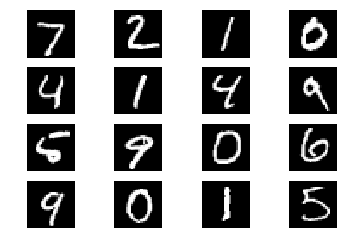

In [13]:
fig, subplots = plt.subplots(4, 4)

for i in range(16):
    x_index = i % 4
    y_index = i // 4

    ax = subplots[y_index, x_index]
    ax.axis('off')
    ax.imshow(x_test_batch[i], cmap='gray')

Display some of the reconstructed data.

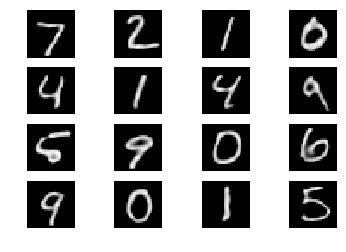

In [14]:
fig, subplots = plt.subplots(4, 4)

for i in range(16):
    x_index = i % 4
    y_index = i // 4

    ax = subplots[y_index, x_index]
    ax.axis('off')
    ax.imshow(predicted[i], cmap='gray')

The reconstructed digits are a bit blurry, but pretty good! :-)